
![title](Figure2-1.jpg)


The image shows a pair of “moons” facing each other in an asymmetrically arranged manner. The moon labeled “Region A” is positioned symmetrically with respect to the y-axis, whereas the moon labeled “Region B” is displaced to the right of the y-axis by an amount equal to the radius r and below the x-axis by the distance d. The two moons have identical parameters: 

Radius of each moon, r = 10, 

Width of each moon, w = 6. 

The vertical distance d separating the two moons is adjustable; it is measured with respect to the x-axis, as indicated in the figure 

i) Increasingly positive values of d signify increased separation between the two moons; 

ii) Increasingly negative values of d signify the two moons’ coming closer to each other. 

The training sample consists of 1000 pairs of data points, with each pair consisting of one point picked from region A and another point picked from region B, both randomly. The test sample consists of 3,000 pairs of data points, again picked in a random manner. 

Tasks: 

Your task is to classify the dataset using SVM (Support Vector Machine) for some cases given below. Generate the dataset for each case and classify using different kernels (e.g. linear, polynomial, radial basis etc.) Show the decision boundary (Plotting the classified points using different color will be enough) 

Case 1: d = 0 

Case 2: |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis. 

Case 3: Increase d negatively such that both of the moons touch each other. 

Case 4: Both moons overlap each other 

Case 5: Add some noise in the training set 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Default parameters
r=10
d=1
N=1000
w=6


def create_dataset(n,d,r,w):
    '''
    Double moon dataset is created with radius r, width w, 
    and n samples belonging to two different regions/classes,
    with d separating the classes.
    '''
    x=np.random.uniform(-r-w/2,r+w/2,10000)
    y=np.random.uniform(0,r+w/2,10000)
    dist=np.sqrt(x*x+y*y)

    num=0
    i=0
    ind_list=[]
    while num<1000:
        #select points inside circular region of width w
        if dist[i]<r+w/2 and dist[i]>r-w/2:
            num+=1
            ind_list=np.append(ind_list,i)
        i+=1

    x_up=np.array([])
    y_up=np.array([])
    for i in range(1000):
        x_up= np.append(x_up,x[np.int(ind_list[i])])
        y_up= np.append(y_up,y[np.int(ind_list[i])])

    #Generate region B
    x_down=x_up+r
    y_down=-y_up-d

    dataset0 = np.vstack((x_up,y_up))
    dataset1 = np.vstack((x_down,y_down))
    dataset = np.hstack((dataset0,dataset1))
    x = dataset.T
    y=np.hstack((np.zeros(dataset0.shape[1]),np.ones(dataset1.shape[1])))
    return x,y

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot decision boundaries
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def classifier(X,y,gamma, degree):
    '''
    SVM classifier using 4 kernels
    gamma: param for rbf
    degree: param for polynomial kernel
    '''
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, C=C))
    models = (clf.fit(X, y) for clf in models)
 

    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.bwr, alpha=0.8)
     
        ax.scatter(X0, X1, c=y, cmap=plt.cm.bwr, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()
    return models

Automatically created module for IPython interactive environment


###  Case 1: d = 0 
Experimenting with different $\gamma$

#### With $\gamma=0.001$

### Training data with decision boundaries

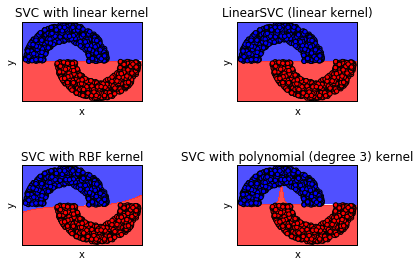

In [3]:
gamma=0.001
degree =3
d=0
#training data
x,y =create_dataset(1000,d,r,w)
model_ = classifier(x,y,gamma,degree)

### Test data classification

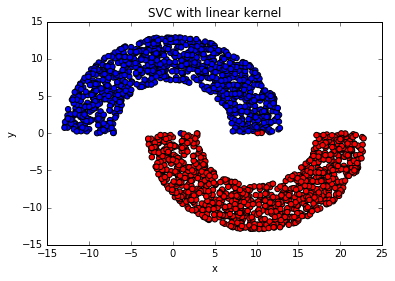

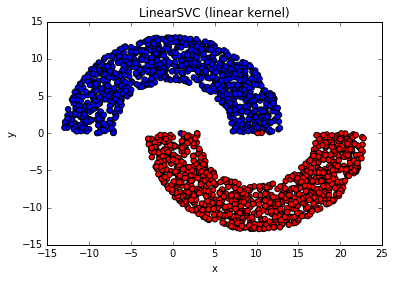

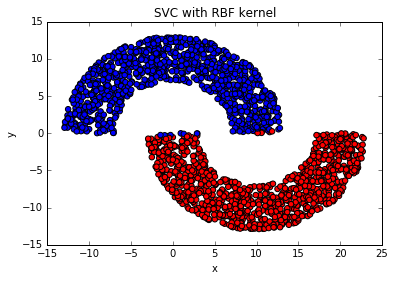

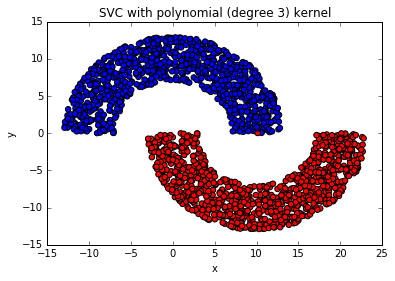

In [4]:
C = 1.0  
models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, C=C))

x,y =create_dataset(1000,d,r,w)
models = (clf.fit(x, y) for clf in models)
 
#testing data
test_x,test_y =create_dataset(3000,d,r,w)
titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

for clf,title in zip(models,titles):
    Z = clf.predict(np.c_[test_x[:,0].ravel(), test_x[:,1].ravel()])
    plt.scatter(test_x[:,0], test_x[:,1], c=Z, cmap=plt.cm.bwr, s=30, edgecolors='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

#### With $\gamma=0.1$,  Training data with decision boundaries

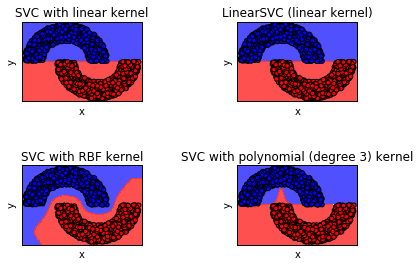

In [5]:
gamma= 0.1
degree= 3
d=0

#training data
x,y =create_dataset(1000,d,r,w)
models= classifier(x,y,gamma,degree)

#### With $\gamma=1$  Training data with decision boundaries

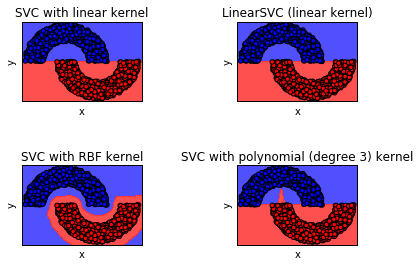

<generator object classifier.<locals>.<genexpr> at 0x7fa4beacb9e8>

In [6]:
gamma= 1
degree = 3
d=0
x,y =create_dataset(1000,d,r,w)
classifier(x,y,gamma,degree)

#### With $\gamma=10$  Training data with decision boundaries

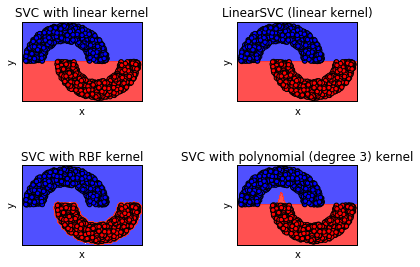

<generator object classifier.<locals>.<genexpr> at 0x7fa4beacba40>

In [7]:
d=0
x,y =create_dataset(1000,d,r,w)
classifier(x,y,10,3)


### Case 2: |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis. 
### Training data with decision boundaries for $\gamma$ = 0.1 and degree =3

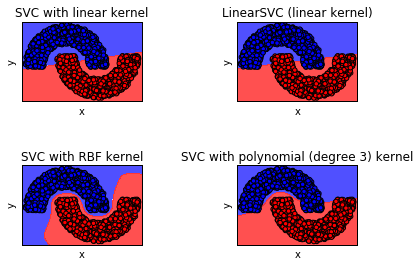

<generator object classifier.<locals>.<genexpr> at 0x7fa4be8c3db0>

In [8]:
gamma=0.1
degree=3
d=-(r-w/2)/2
x,y =create_dataset(1000,d,r,w)
classifier(x,y,gamma,degree)

### Test data classification

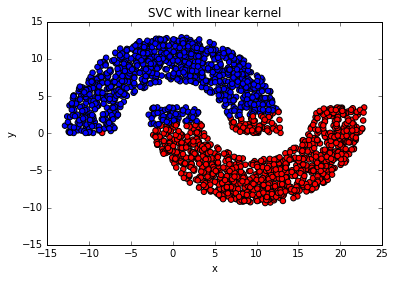

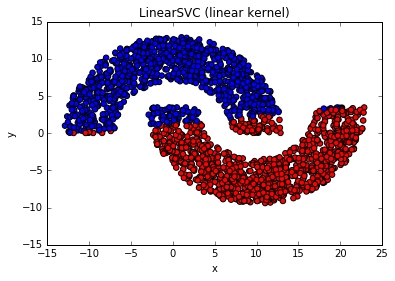

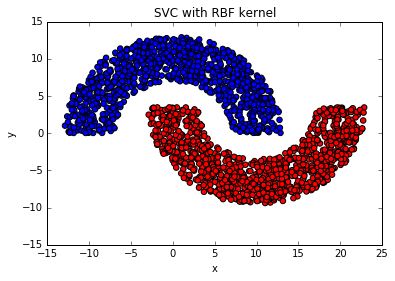

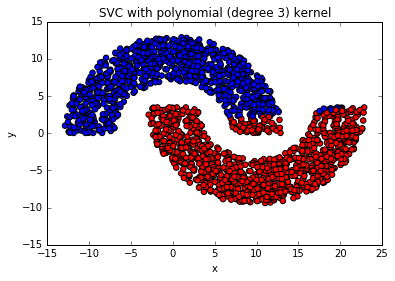

In [9]:
C = 1.0  
models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, C=C))

x,y =create_dataset(1000,d,r,w)
models = (clf.fit(x, y) for clf in models)
 
#testing data 
test_x,test_y =create_dataset(3000,d,r,w)
titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

for clf,title in zip(models,titles):
    Z = clf.predict(np.c_[test_x[:,0].ravel(), test_x[:,1].ravel()])
    plt.scatter(test_x[:,0], test_x[:,1], c=Z, cmap=plt.cm.bwr, s=30, edgecolors='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()


### Case 3: Increase d negatively such that both of the moons touch each other. 
### $\gamma$ chosen = 0.1 and degree =3

### Training data with decision boundaries

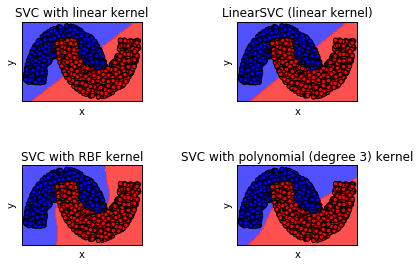

<generator object classifier.<locals>.<genexpr> at 0x7fa4c03d2e08>

In [10]:
d=-3*(r+w/2)/4
x,y =create_dataset(1000,d,r,w)
classifier(x,y,0.1,3)

### Test data classification

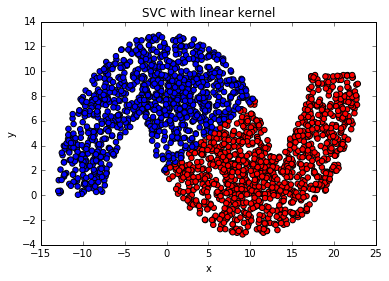

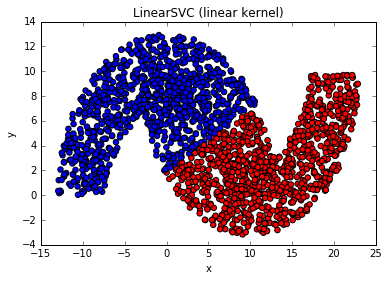

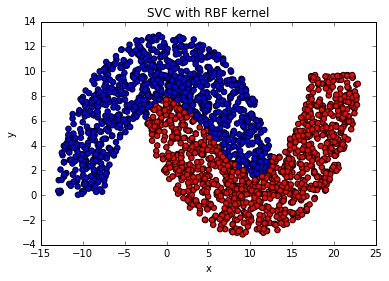

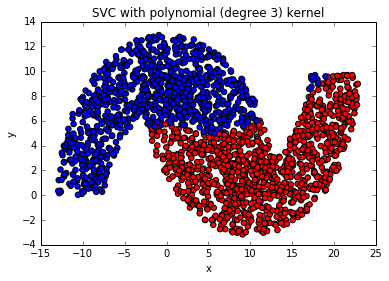

In [11]:
C = 1.0  
models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, C=C))

x,y =create_dataset(1000,d,r,w)
models = (clf.fit(x, y) for clf in models)
 
    
test_x,test_y =create_dataset(3000,d,r,w)
titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

for clf,title in zip(models,titles):
    Z = clf.predict(np.c_[test_x[:,0].ravel(), test_x[:,1].ravel()])
    plt.scatter(test_x[:,0], test_x[:,1], c=Z, cmap=plt.cm.bwr, s=30, edgecolors='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()


### Case 4: Both moons overlap each other 
### $\gamma$ chosen = 0.1 and degree =3

### Training data with decision boundaries

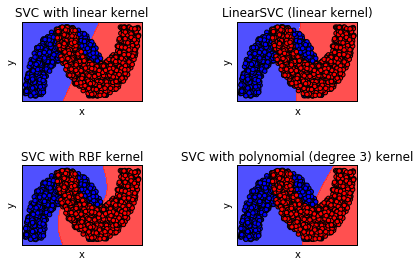

In [12]:
d=-(r+w/2)
x,y =create_dataset(1000,d,r,w)
models_=classifier(x,y,0.1,3)


### Test data classification with the trained model; chosen gamma = 0.1, degree of polynomial = 3

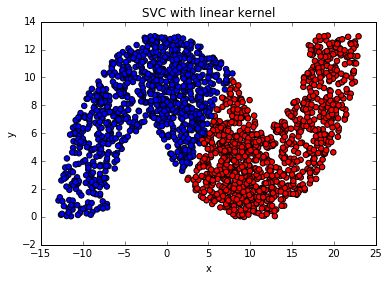

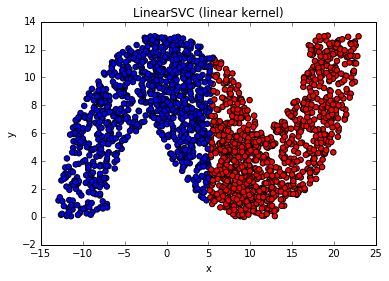

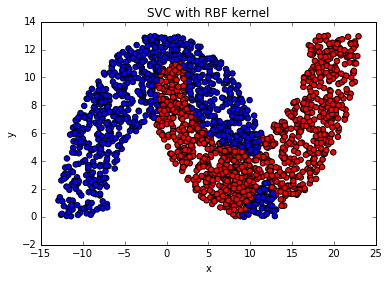

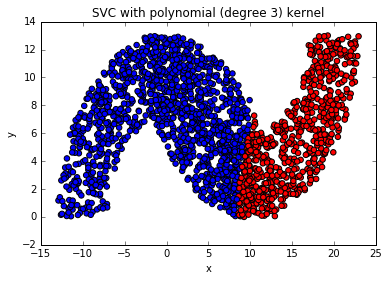

In [13]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.1, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
d=-(r+w/2)
x,y =create_dataset(1000,d,r,w)
models = (clf.fit(x, y) for clf in models)
 
    
test_x,test_y =create_dataset(3000,d,r,w)
titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

for clf,title in zip(models,titles):
    Z = clf.predict(np.c_[test_x[:,0].ravel(), test_x[:,1].ravel()])
    plt.scatter(test_x[:,0], test_x[:,1], c=Z, cmap=plt.cm.bwr, s=30, edgecolors='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()


### Case 5: Add some noise in the training set with d=-(r-w/2)

### Training data with decision boundaries

/home/bhargavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 768  479 1287  254 1405  112  292 1001  173  498 1796 1039 1568   70 1857
 1630  161 1220  632 1875  423 1728 1220 1287  358 1796 1933  938 1152  986
 1032  705 1953  759 1936 1108  711 1052  367  746  174  357 1454   33  728
 1420 1622  521 1540  468  728  963  355  122 1257 1565 1289  724 1622 1589
 1935  920  221  763 1790 1535 1509 1079 1311  674 1334 1756 1271  661  634
 1026 1718  987 1568  578  384 1835  359  128  341 1822  100 1492 1605  553
  628 1385 1634  847   54  213 1996  993  298 1143]


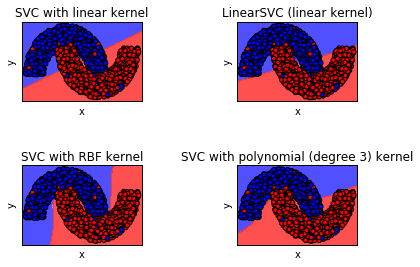

In [14]:
d=-(r-w/2)
pc = 5 # percentage of noise added 
def noisydata(y,pc):
    #5%noise
    up_noise_ind =np.random.randint(1,len(y),np.round(0.01*pc*len(y)))
    y1=np.array([])
    for i in range(len(y)):
        if i in up_noise_ind:
            if y[i] == 1:

                y1= np.append(y1,0)
            else:
                y1=np.append(y1,1)  
        else:
            y1 =np.append(y1,y[i])
        
    return y1

gamma=0.1
degree=3
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.1, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))

x,y =create_dataset(1000,d,r,w)
y1= noisydata(y,pc)
_ = classifier(x,y1,gamma,degree)

### Test data classification

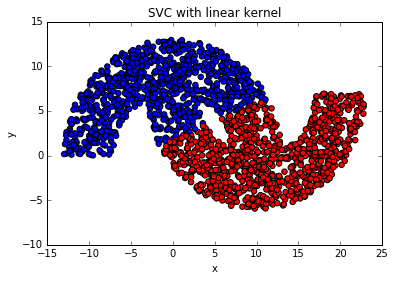

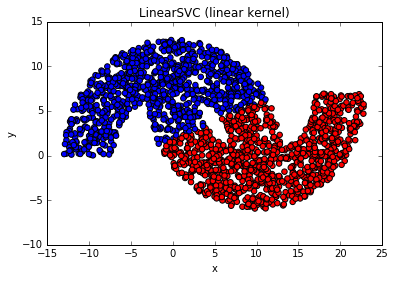

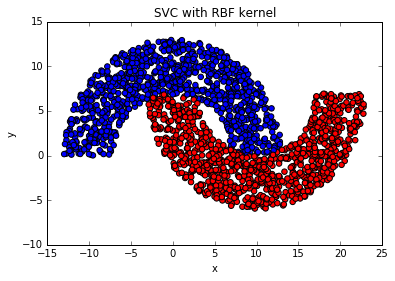

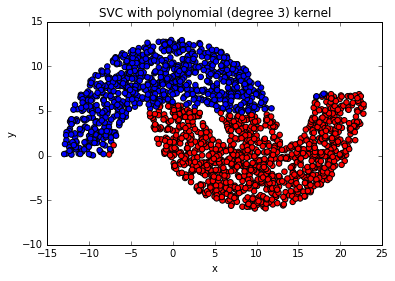

In [15]:
models = (clf.fit(x, y1) for clf in models)

    
test_x,test_y =create_dataset(3000,d,r,w)
titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

for clf,title in zip(models,titles):
    Z = clf.predict(np.c_[test_x[:,0].ravel(), test_x[:,1].ravel()])
    plt.scatter(test_x[:,0], test_x[:,1], c=Z, cmap=plt.cm.bwr, s=30, edgecolors='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

/home/bhargavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 102  598  928  717  921  962  931  762   50 1811  688   15  839 1430  109
  594 1722  116 1872 1975 1765  971  212  834  312 1846  467 1253  286 1304
 1056 1260   30  723 1764   12 1775 1325 1725  563  588 1913 1704 1112  355
   40  460  834 1323 1057 1780 1396  100  343 1455 1458 1712 1072 1628 1701
  460 1874 1222 1129 1279 1011 1851 1144  473 1407  698  335  819  396   92
 1650 1311 1691 1704  988 1881   48  107   59 1137  158 1251  767  522  831
  488 1458  398 1268  482 1310  883  898  916 1810]


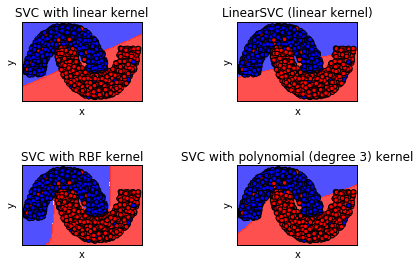

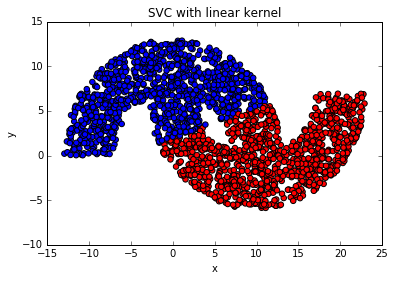

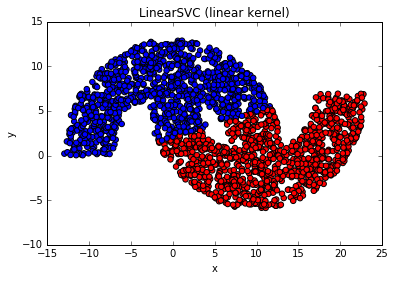

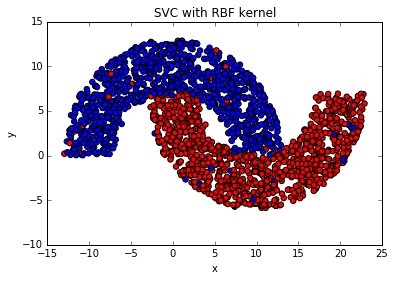

In [ ]:
#training with noise
models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=10, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))

x,y =create_dataset(1000,d,r,w)
y1= noisydata(y,pc)
_ = classifier(x,y1,gamma,degree)
models = (clf.fit(x, y1) for clf in models)


#testing with noise
test_x,test_y =create_dataset(3000,d,r,w)
titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

for clf,title in zip(models,titles):
    Z = clf.predict(np.c_[test_x[:,0].ravel(), test_x[:,1].ravel()])
    plt.scatter(test_x[:,0], test_x[:,1], c=Z, cmap=plt.cm.bwr, s=30, edgecolors='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

### Observation with different kernels: Best classification is obtained using Rbf and polynomial of degree 3. However, they are computationally expensive.

### Observation of experimenting with $\gamma$ : We observe that with increase in $\gamma$ the model with RBF kernel tries to over fit the data .

### Observation with noise addition : When noise is added and $\gamma$ is increased, the RBF kernel tries to fit every noisy sample and hence, a complicated classifier is obtained. Whereas, other kernels are robust to noise.